**Parabolic Well Solution**

Marie Lopez del Puerto - June 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

In [2]:
N = 100
m = 9.11*10**-31 # kg
L = 10*10**-9 # m
hbar = 6.626*10**-34/(2*np.pi) #Js
ev = 1.602*10**-19 # J to eV conversion
d = L/N
w = 10**14 # Hz

In [5]:
# Input matrix H:
D = -2.0*np.ones((1,N))
V = np.ones((1,N-1))
H = -(hbar**2.)/(2.*m*d**2.)*( np.diagflat(D,0)+ np.diagflat(V,1)+ np.diagflat(V, -1) )

for i in range(1,int(N)):
    H[i,i] = H[i,i]+0.5*m*w**2*(i*d-L/2)**2
    

In [6]:
# First 5 (lowest) eigenvalues and eigenfunctions:
vec, eg = eigsh(H, 5, which='SM')
#vec = np.sort(vec)/ev
print('Numeric eigenvalues: ', vec/ev, 'eV')

Numeric eigenvalues:  [ 0.0328961   0.0986527   0.16433811  0.22995298  0.2955029 ] eV


In [7]:
# Exact eigenvalues:
n = np.arange(0,5)
egexact=(n+0.5)*hbar*w/(1.602*10**-19)
print('Exact eigenvalues: ', egexact,'eV')

Exact eigenvalues:  [ 0.03291388  0.09874163  0.16456939  0.23039715  0.2962249 ] eV


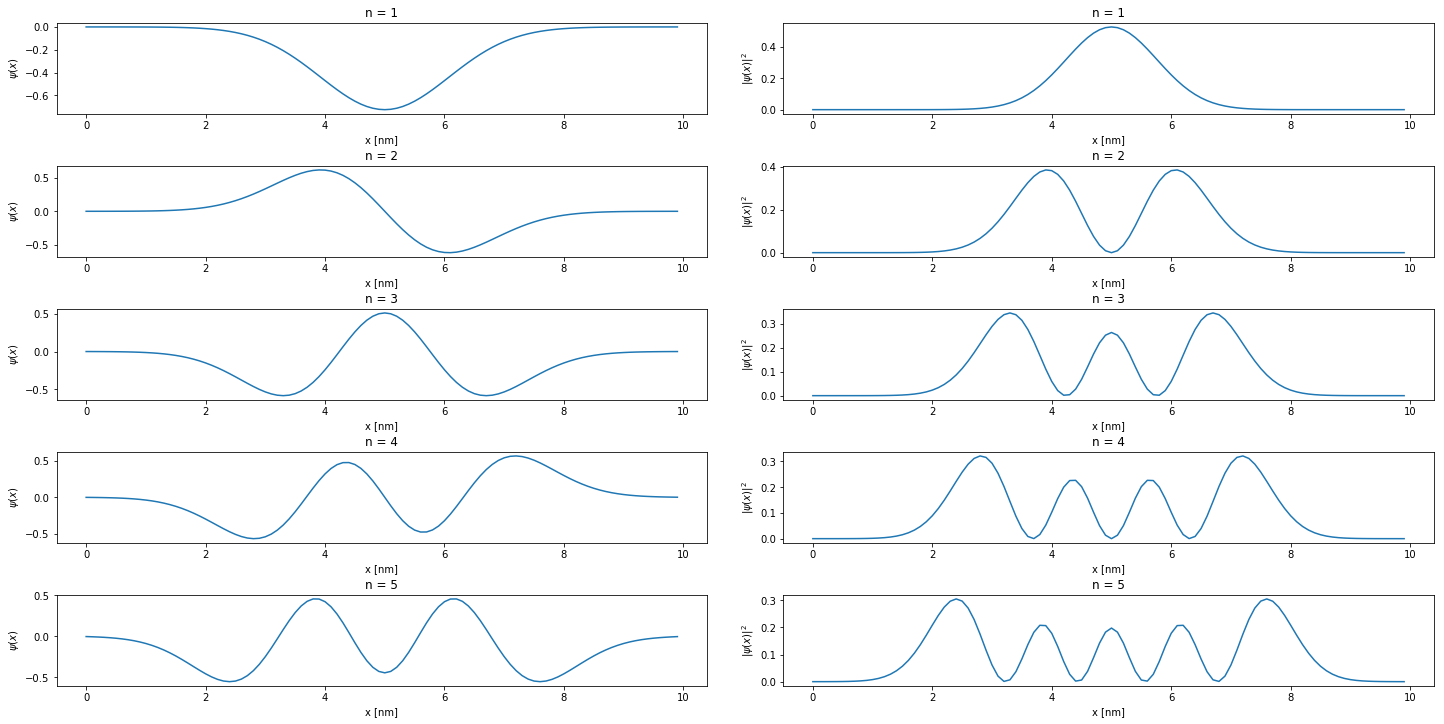

In [8]:
# Plot
L = 10*10**-9
x = np.arange(0,L,d)*10**9
L = 10 # L in nm

fig, ax = plt.subplots(nrows=5,ncols=2,figsize=(20, 10))

for n in np.arange(0,5):

    plt.subplot(5,2,2*n+1)
    plt.plot(x, np.sqrt(N/L)*eg[:,n])
    plt.tight_layout(pad=0.5, w_pad=3, h_pad=0.5)
    plt.title('n = %s'%(n+1))
    plt.xlabel('x [nm]')
    plt.ylabel('$\psi(x)$')

    plt.subplot(5,2,2*n+2)
    plt.plot(x, (np.sqrt(N/L)*eg[:,n])**2)
    plt.tight_layout(pad=0.5, w_pad=3, h_pad=0.5)
    plt.title('n = %s'%(n+1))
    plt.xlabel('x [nm]')
    plt.ylabel('$|\psi(x)|^2$')

plt.show()